In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [2]:
token_names_path = './DATA/TOKEN_DAILY'
token_names = os.listdir(token_names_path)
print(token_names)

['JUPITER', 'MONERO', 'MAKER', 'STARKNET', 'BITTENSOR', 'INJECTIVO', 'CORE', 'SEI', 'THOR', 'DOGWITFHAT', 'GALA', 'FLOKI', 'OKB', 'VECHAIN', 'ETHERIUM', 'USDT', 'FANTOM', 'USDC', 'PYTH NETWORK', 'BONK', 'BEAM', 'FETCH_AI', 'CELESTIA', 'SUI', 'ARWEAVE', 'LIDO', 'FLOW', 'THETA', 'BTC', 'AAVE', 'BITGET', 'BNB', 'ALGORAND', 'ONDO', 'SOLANA', 'XRP', 'OPTIMISM', 'ETHENA', 'STACKS']


In [3]:
token_path  = './DATA/TOKEN_DAILY/AAVE/'
token_files = os.listdir(token_path)
print(token_files)
token_data = []
for token_file in token_files:
    token = pd.read_csv(token_path + token_file, sep=';')
    token['symbol'] = 'AAVE'
    token_data.append(token)


['Aave_14_6_2023-13_6_2024_historical_data_coinmarketcap.csv', 'Aave_14_6_2023-13_6_2024_historical_data_coinmarketcap.csv:Zone.Identifier', 'Aave_14_6_2021-14_6_2022_historical_data_coinmarketcap.csv', 'Aave_14_6_2022-14_6_2023_historical_data_coinmarketcap.csv', 'Aave_14_6_2021-14_6_2022_historical_data_coinmarketcap.csv:Zone.Identifier', 'Aave_14_6_2020-14_6_2021_historical_data_coinmarketcap.csv', 'Aave_14_6_2020-14_6_2021_historical_data_coinmarketcap.csv:Zone.Identifier', 'Aave_14_6_2022-14_6_2023_historical_data_coinmarketcap.csv:Zone.Identifier']


In [4]:
token_data = pd.concat(token_data)

In [5]:
token_data.shape

(1357, 14)

In [6]:
token_data.duplicated().sum()

6

In [7]:
#drop days duplicates
token_data = token_data.drop_duplicates()

In [8]:
token_data.shape

(1351, 14)

In [9]:
token_data.head()

timeOpen                 timeClose  \
0  2024-06-12T00:00:00.000Z  2024-06-12T23:59:59.999Z   
1  2024-06-11T00:00:00.000Z  2024-06-11T23:59:59.999Z   
2  2024-06-10T00:00:00.000Z  2024-06-10T23:59:59.999Z   
3  2024-06-09T00:00:00.000Z  2024-06-09T23:59:59.999Z   
4  2024-06-08T00:00:00.000Z  2024-06-08T23:59:59.999Z   

                   timeHigh                   timeLow    name       open  \
0  2024-06-12T13:10:00.000Z  2024-06-12T01:49:00.000Z  2781.0  87.737688   
1  2024-06-11T00:07:00.000Z  2024-06-11T17:30:00.000Z  2781.0  90.782708   
2  2024-06-10T15:54:00.000Z  2024-06-10T08:01:00.000Z  2781.0  93.460619   
3  2024-06-09T19:15:00.000Z  2024-06-09T05:10:00.000Z  2781.0  92.962420   
4  2024-06-08T03:37:00.000Z  2024-06-08T22:30:00.000Z  2781.0  97.437971   

        high        low      close        volume     marketCap  \
0  93.420605  86.885327  89.973487  1.145055e+08  1.335874e+09   
1  90.938735  85.134147  87.736754  1.458540e+08  1.302644e+09   
2  93.623815  90.685589  90.782173  1.318530e+08  1.347851e+09   
3  94.070442  92.053125  93.460577  1.110245e+08  1.387536e+09   
4  97.962497  92.430492  92.972066  9.313963e+07  1.380271e+09   

                  timestamp symbol [ZoneTransfer]  
0  2024-06-12T23:59:59.999Z   AAVE            NaN  
1  2024-06-11T23:59:59.999Z   AAVE            NaN  
2  2024-06-10T23:59:59.999Z   AAVE            NaN  
3  2024-06-09T23:59:59.999Z   AAVE            NaN  
4  2024-06-08T23:59:59.999Z   AAVE            NaN

In [10]:
token_data['date'] = token_data['timeOpen'].str.split('T').str[0]

In [11]:
token_data.drop(columns=['timeOpen','timeClose','timeHigh','timeLow','timestamp','[ZoneTransfer]'], inplace=True)

In [138]:
token_data.columns

Index(['PC1'], dtype='object')

In [14]:
token_data['date'] = pd.to_datetime(token_data['date'])

In [15]:
token_data=token_data.set_index('date')

In [16]:
token_data.sort_index(inplace=True)

In [17]:
#get day where close price is most high
token_data['close'].idxmax()

Timestamp('2021-05-18 00:00:00')

<Figure size 1500x700 with 0 Axes>

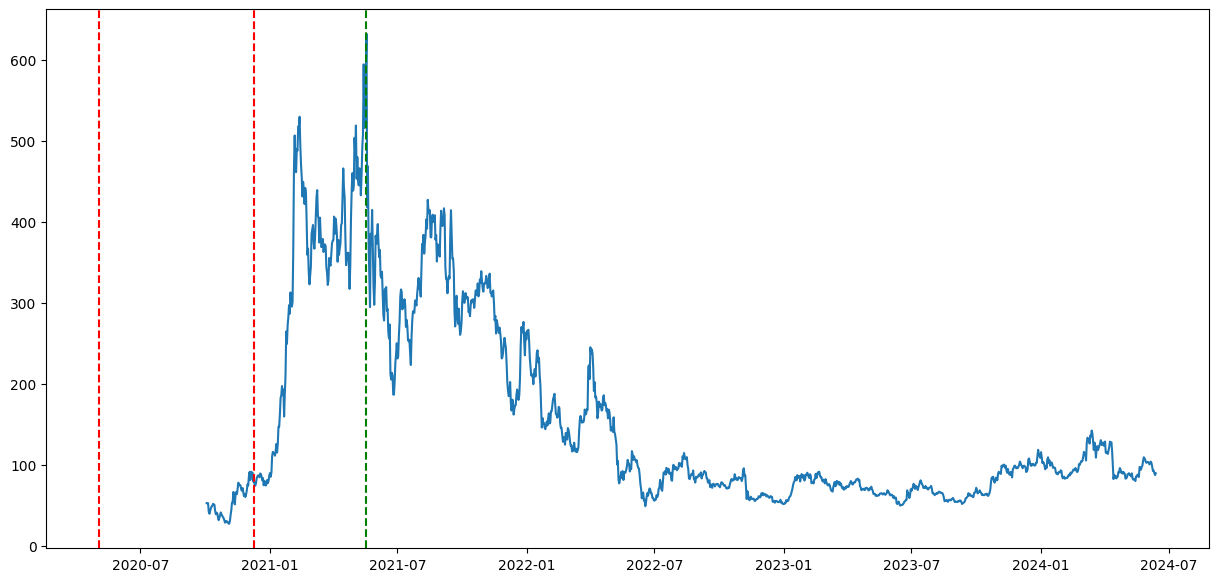

In [18]:
plt.figure(figsize=(15, 7))
plt.figure(figsize=(15, 7))
plt.plot(token_data['close'])
halving_day =pd.to_datetime('2020-05-3')
halving_bulrun=halving_day+pd.Timedelta(days=220)
halving_day_max_close  = token_data['close'].idxmax()
plt.axvline(x=halving_day, color='r', linestyle='--')
plt.axvline(x=halving_bulrun, color='r', linestyle='--')
plt.axvline(x=halving_day_max_close, color='g', linestyle='--')

In [19]:
halving_day_max_close = pd.to_datetime(halving_day_max_close)

In [20]:
halving_day_max_close

Timestamp('2021-05-18 00:00:00')

In [21]:
halving_day

Timestamp('2020-05-03 00:00:00')

In [22]:
diff = halving_day_max_close.tz_localize(None) - halving_day.tz_localize(None)
print(diff)

380 days 00:00:00


vamos a realizar el mismo proceso para los demas tokens y obtener el dia promedio donde se obtendra su maximo precio

In [23]:
def tokens_data_open_files(name):
    token_path  = './DATA/TOKEN_DAILY/'+name+'/'
    token_files = os.listdir(token_path)
    token_data = []
    for toke_file in token_files:
        token = pd.read_csv(token_path + toke_file, sep=';')
        token['symbol'] = name
        token_data.append(token)
    token_data = pd.concat(token_data)
    token_data['date'] = token_data['timeOpen'].str.split('T').str[0]
    token_data.drop(columns=['timeOpen','timeClose','timeHigh','timeLow','timestamp','[ZoneTransfer]'], inplace=True)
    token_data['date'] = pd.to_datetime(token_data['date'])
    token_data=token_data.set_index('date')
    token_data.drop_duplicates()
    token_data.sort_index(inplace=True)
    return token_data

In [24]:
tokens = []
for token in token_names:
    token_data = tokens_data_open_files(token)
    tokens.append(token_data) 

In [25]:
len(tokens)

39

In [26]:
halving_days = [
    '2016-07-2',
    '2020-05-3',
    '2024-04-19'
]

halving_days = [pd.to_datetime(day) for day in halving_days]
halving_bulruns = [
    halving_days[0]+pd.Timedelta(days=250),
    halving_days[1]+pd.Timedelta(days=150),
    halving_days[2]+pd.Timedelta(days=150)
]

In [27]:
#get max close bettwen halvings day
def get_max_close(token):
    max_close = []

    filter = (token.index.tz_localize(None) > halving_days[0].tz_localize(None)) & (token.index.tz_localize(None) < halving_days[1].tz_localize(None))
    token_halving = token.loc[filter]
    if token_halving.shape[0] > 0:
        max_close.append(token_halving['close'].idxmax())
    
    filter = (token.index.tz_localize(None) > halving_days[1].tz_localize(None)) & (token.index.tz_localize(None) < halving_days[2].tz_localize(None))
    token_halving = token.loc[filter]
    if token_halving.shape[0] > 0:
        max_close.append(token_halving['close'].idxmax())
    
    filter = (token.index.tz_localize(None) > halving_days[2].tz_localize(None))
    token_halving = token.loc[filter]
    if token_halving.shape[0] > 0:
        max_close.append(token_halving['close'].idxmax())
    
    return max_close

max_close = get_max_close(tokens[0])

In [28]:
max_close

[Timestamp('2024-03-31 00:00:00'), Timestamp('2024-05-20 00:00:00')]

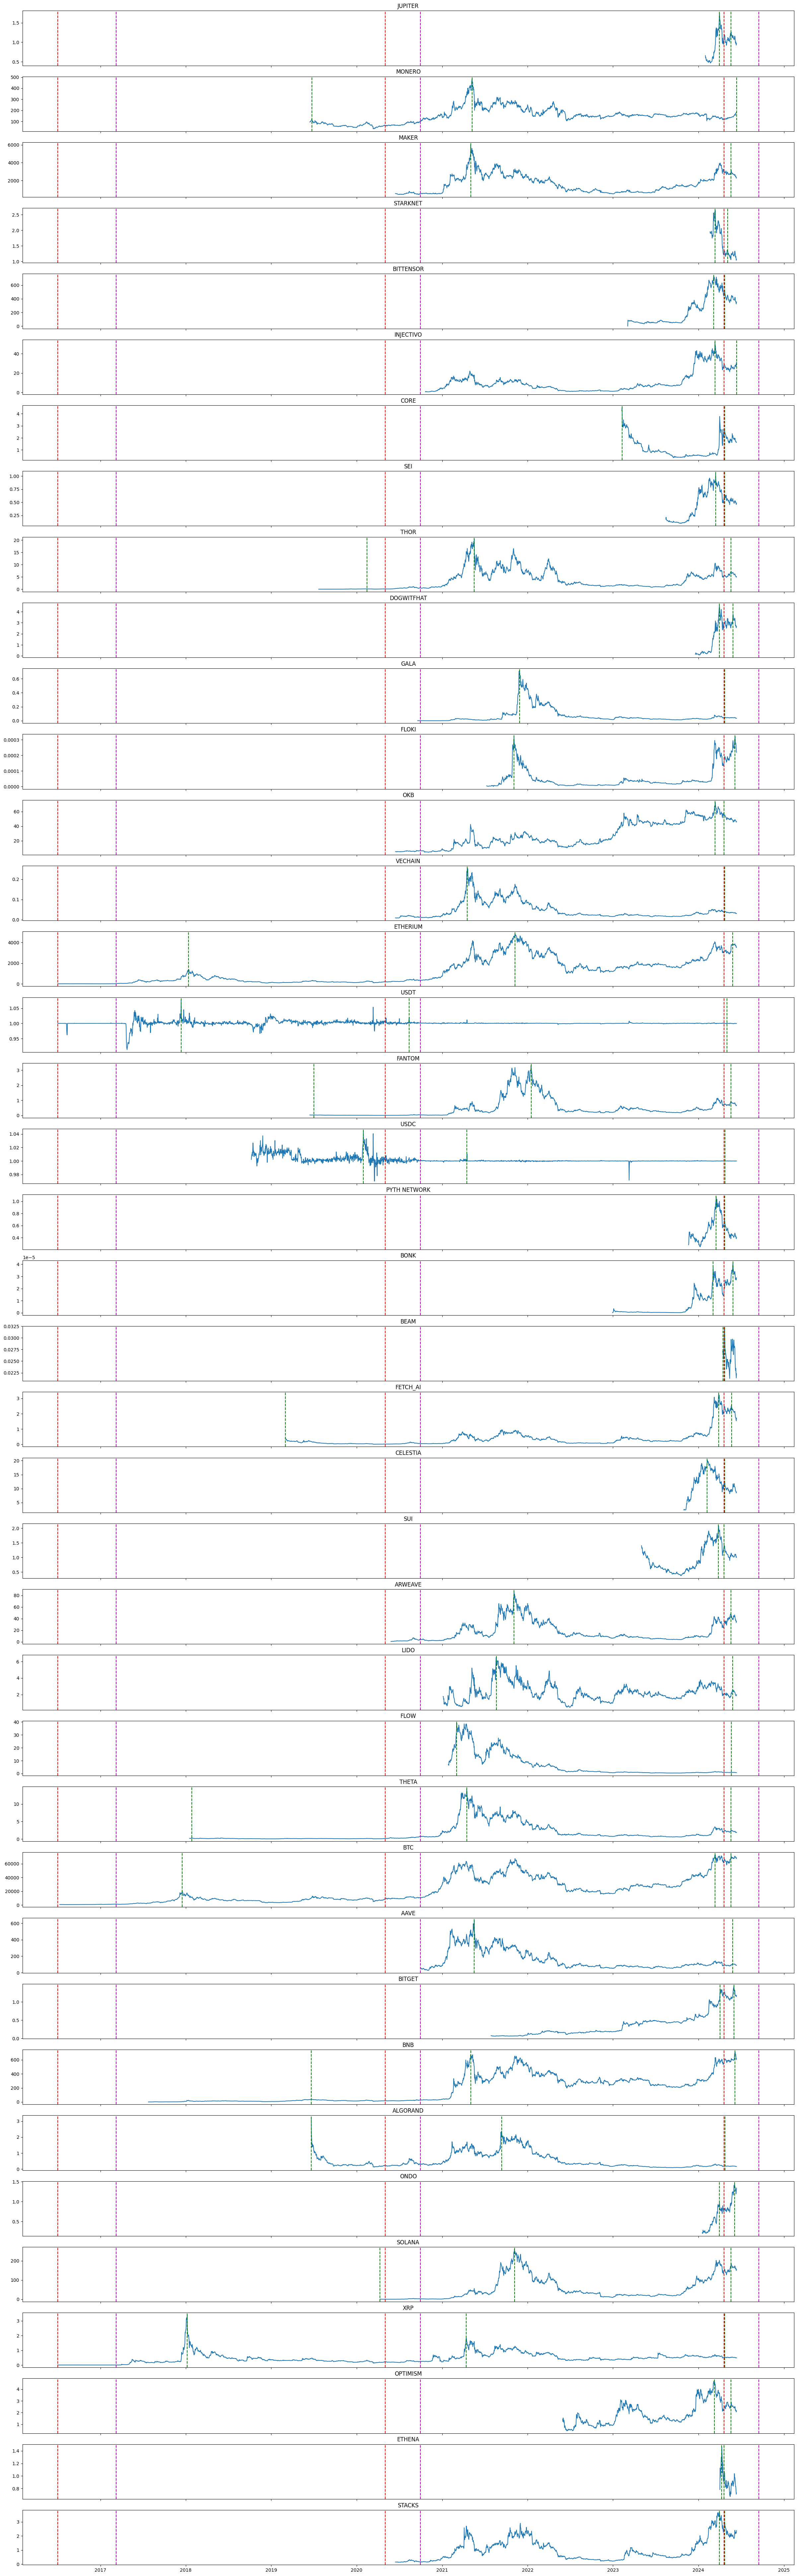

In [29]:
ax, fig = plt.subplots(figsize=(30, 100),nrows=len(tokens), ncols=1, sharex=True)
for i, token in enumerate(tokens):
    filter  = token.index.tz_localize(None) > halving_days[0].tz_localize(None)
    token = token.loc[filter]
    fig[i].plot(token['close'])
    for halving_day in halving_days:
        fig[i].axvline(x=halving_day, color='r', linestyle='--')
    for halving_bulrun in halving_bulruns:
        fig[i].axvline(x=halving_bulrun, color='m', linestyle='--')
    max_close = get_max_close(token)
    for day in max_close:
        fig[i].axvline(x=day, color='g', linestyle='--')
    fig[i].set_title(token['symbol'].iloc[0])

del grupo de 39 tokens recopilados de fecha de creacion, hay muchos con poca tiempo en desarrollo. Ademas tenemos en cuenta que el halving con mas registros es el tercero vamos a observar un frame obsevando este ventana de tiempo

In [30]:
halving_days = [
    '2020-05-3',
    '2024-04-19'
]

halving_days = [pd.to_datetime(day) for day in halving_days]
halving_bulruns = [
    halving_days[0]+pd.Timedelta(days=150),
    halving_days[1]+pd.Timedelta(days=150)
]

In [31]:
def get_max_close(token):
    max_close = []

    filter = (token.index.tz_localize(None) > halving_days[0].tz_localize(None)) & (token.index.tz_localize(None) < halving_days[1].tz_localize(None))
    token_halving = token.loc[filter]
    if token_halving.shape[0] > 0:
        max_close.append(token_halving['close'].idxmax())
    
    
    filter = (token.index.tz_localize(None) > halving_days[1].tz_localize(None))
    token_halving = token.loc[filter]
    if token_halving.shape[0] > 0:
        max_close.append(token_halving['close'].idxmax())
    
    return max_close

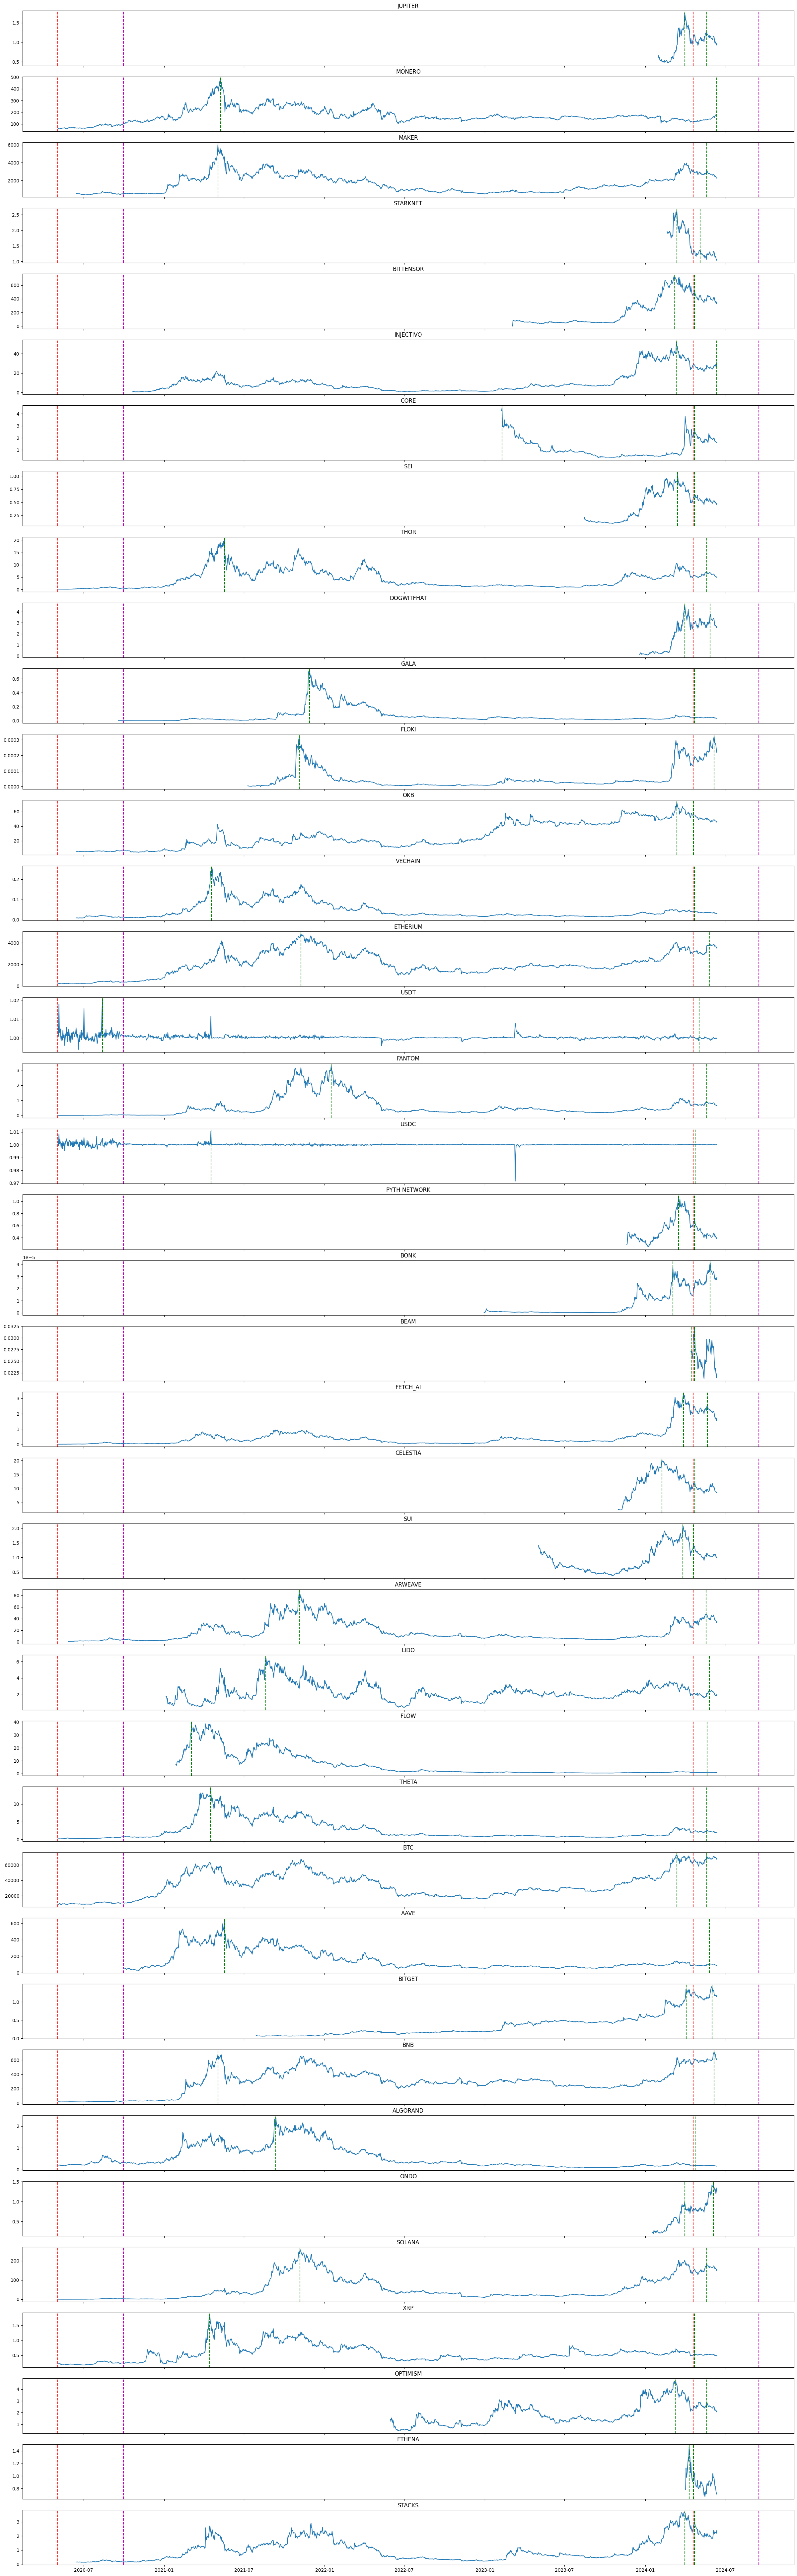

In [32]:
ax, fig = plt.subplots(figsize=(30, 100),nrows=len(tokens), ncols=1, sharex=True)
for i, token in enumerate(tokens):
    filter  = token.index.tz_localize(None) > halving_days[0].tz_localize(None)
    token = token.loc[filter]
    fig[i].plot(token['close'])

    for halving_day in halving_days:
        fig[i].axvline(x=halving_day, color='r', linestyle='--')
    for halving_bulrun in halving_bulruns:
        fig[i].axvline(x=halving_bulrun, color='m', linestyle='--')
    max_close = get_max_close(token)
    for day in max_close:
        fig[i].axvline(x=day, color='g', linestyle='--')
    fig[i].set_title(token['symbol'].iloc[0])

inspeccionando, y clasificando token podemos agrupar los siguientes por sus maximos obtenidos:
* BULRUN INFLUENCE

- XRP
- VECHAIN 
- THOR
- THETA
- MONERO
- MAKER
- GALA
- BNB
- AAVE

* SAME DAYS HIGH
- STACKS
- LIDO
- FLOW
- FANTOM
- FETCH_AI
- BEAM
- ARWEAVE

NEW HALVING INFLUENCE
- CELESTIA
- BTC
- BONK


In [33]:
tokens[0].drop(columns=['name'])

symbol      open      high       low     close        volume  \
date                                                                        
2024-01-31  JUPITER  1.599119  2.043305  0.621318  0.657842  1.007394e+09   
2024-02-01  JUPITER  0.658857  0.676725  0.559377  0.599174  7.934886e+08   
2024-02-02  JUPITER  0.599984  0.643654  0.578431  0.616105  6.422210e+08   
2024-02-03  JUPITER  0.616296  0.619477  0.564597  0.564597  3.756904e+08   
2024-02-04  JUPITER  0.564675  0.572141  0.526660  0.530609  3.223909e+08   
...             ...       ...       ...       ...       ...           ...   
2024-06-10  JUPITER  1.009432  1.012217  0.965527  0.968544  7.839698e+07   
2024-06-11  JUPITER  0.968523  0.974488  0.900214  0.927656  1.106061e+08   
2024-06-12  JUPITER  0.927564  1.008198  0.901950  0.969892  1.261177e+08   
NaT         JUPITER       NaN       NaN       NaN       NaN           NaN   
NaT         JUPITER       NaN       NaN       NaN       NaN           NaN   

               marketCap  
date                      
2024-01-31  8.880872e+08  
2024-02-01  8.088848e+08  
2024-02-02  8.317420e+08  
2024-02-03  7.622065e+08  
2024-02-04  7.163223e+08  
...                  ...  
2024-06-10  1.307534e+09  
2024-06-11  1.252336e+09  
2024-06-12  1.309355e+09  
NaT                  NaN  
NaT                  NaN  

[136 rows x 7 columns]

In [34]:
tokens__=pd.concat(tokens)
tokens__.dropna(inplace=True)

In [35]:
def calculate_features(df):
    feature_dict = {
        'mean_high': df['high'].mean(),
        'std_high': df['high'].std(),
        'min_high': df['high'].min(),
        'max_high': df['high'].max(),
        'median_high': df['high'].median(),
        'range_high': df['high'].max() - df['high'].min(),
        'skewness_high': df['high'].skew(),
        'kurtosis_high': df['high'].kurtosis(),
        'mean_low': df['low'].mean(),
        'std_low': df['low'].std(),
        'min_low': df['low'].min(),
        'max_low': df['low'].max(),
        'median_low': df['low'].median(),
        'range_low': df['low'].max() - df['low'].min(),
        'skewness_low': df['low'].skew(),
        'kurtosis_low': df['low'].kurtosis(),
        'mean_close': df['close'].mean(),
        'std_close': df['close'].std(),
        'min_close': df['close'].min(),
        'max_close': df['close'].max(),
        'median_close': df['close'].median(),
        'range_close': df['close'].max() - df['close'].min(),
        'skewness_close': df['close'].skew(),
        'kurtosis_close': df['close'].kurtosis(),
        'mean_volume': df['volume'].mean(),
        'std_volume': df['volume'].std(),
        'mean_marketCap': df['marketCap'].mean(),
        'std_marketCap': df['marketCap'].std(),
        'daily_return_mean': df['close'].pct_change().mean(),
        'daily_return_std': df['close'].pct_change().std(),
        'cumulative_return': (df['close'].iloc[-1] / df['close'].iloc[0]) - 1,
        'volatility': df['close'].pct_change().rolling(window=7).std().mean()
    }
    return feature_dict

In [36]:
features = pd.DataFrame()
for token_id, group in tokens__.groupby('symbol'):
    token_features = calculate_features(group)
    token_features['symbol'] = token_id
    features = pd.concat([features, pd.DataFrame(token_features, index=[0])])

In [37]:
features.set_index('symbol', inplace=True)

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [39]:
features.head()

mean_high    std_high   min_high    max_high  median_high  \
symbol                                                                 
AAVE      161.814378  126.532646  28.433069  666.864979    97.685563   
ALGORAND    0.548392    0.520006   0.090311    3.280179     0.313922   
ARWEAVE    18.235185   17.748374   0.543247   90.940044    10.320517   
BEAM        0.027434    0.002848   0.022596    0.036106     0.027392   
BITGET      0.375218    0.320654   0.061245    1.484946     0.206365   

          range_high  skewness_high  kurtosis_high    mean_low     std_low  \
symbol                                                                       
AAVE      638.431909       1.356393       0.838624  146.966005  111.716574   
ALGORAND    3.189868       1.637705       2.112233    0.494505    0.455732   
ARWEAVE    90.396797       1.420675       1.260659   16.190538   15.554814   
BEAM        0.013510       0.522729       0.249499    0.025112    0.002362   
BITGET      1.423701       1.446782       1.515871    0.358896    0.304889   

          ...  skewness_close  kurtosis_close   mean_volume    std_volume  \
symbol    ...                                                               
AAVE      ...        1.312385        0.609331  2.482126e+08  2.857974e+08   
ALGORAND  ...        1.589066        1.806492  1.695150e+08  2.683449e+08   
ARWEAVE   ...        1.407913        1.187903  3.627738e+07  5.230431e+07   
BEAM      ...        0.101827       -0.583076  2.726080e+07  2.835873e+07   
BITGET    ...        1.427532        1.441109  1.387411e+07  1.662877e+07   

          mean_marketCap  std_marketCap  daily_return_mean  daily_return_std  \
symbol                                                                         
AAVE        2.055208e+09   1.487008e+09           0.002218          0.060693   
ALGORAND    2.224236e+09   2.782648e+09           0.000277          0.061437   
ARWEAVE     6.867867e+08   7.086674e+08           0.005711          0.078331   
BEAM        1.323895e+09   1.431073e+08          -0.001983          0.053163   
BITGET      4.242824e+08   5.076126e+08           0.003271          0.036228   

          cumulative_return  volatility  
symbol                                   
AAVE               0.692775    0.052736  
ALGORAND          -0.948173    0.052685  
ARWEAVE           63.237787    0.067264  
BEAM              -0.178282    0.051239  
BITGET            14.614879    0.029149  

[5 rows x 32 columns]

In [40]:
features.drop(index=['USDT','STARKNET','VECHAIN','LIDO','ETHENA','USDC','BTC'], inplace=True)

In [41]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

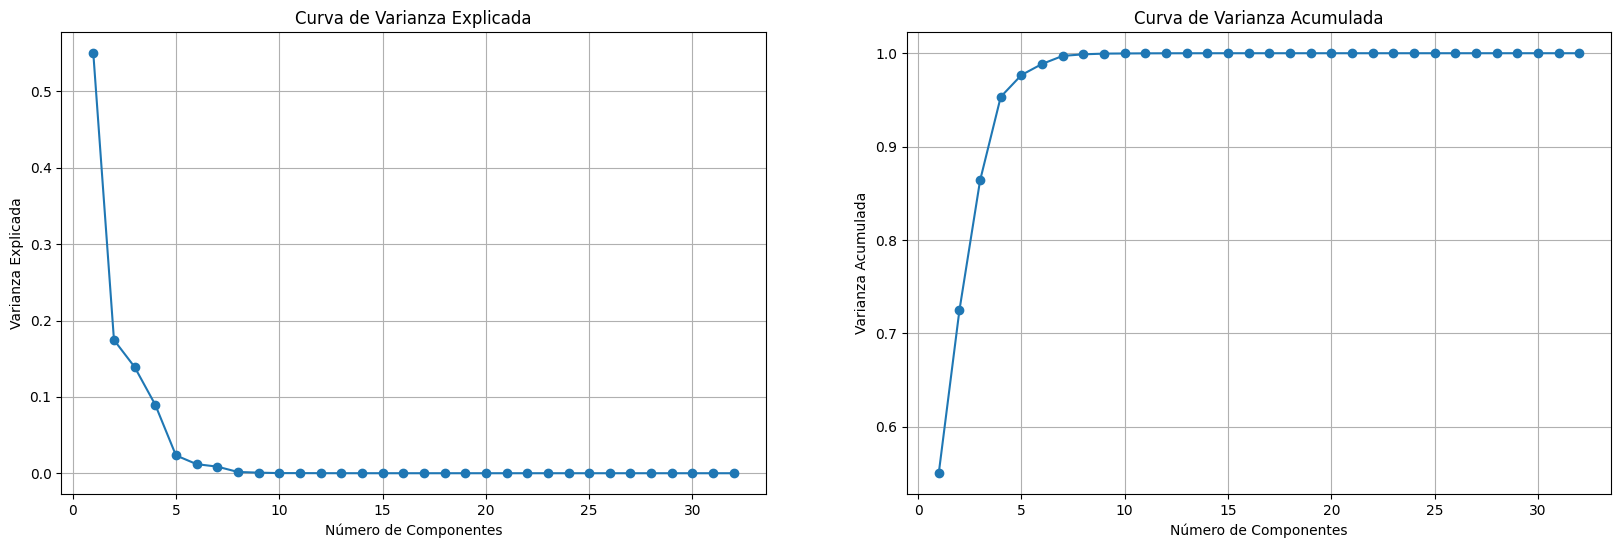

In [42]:
pca = PCA().fit(features_scaled)
fig,ax = plt.subplots(figsize=(20, 6),ncols=2, nrows=1)
ax[0].plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
ax[0].set_xlabel('Número de Componentes')
ax[0].set_ylabel('Varianza Explicada')
ax[0].set_title('Curva de Varianza Explicada')
ax[0].grid(True)
ax[1].plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
ax[1].set_xlabel('Número de Componentes')
ax[1].set_ylabel('Varianza Acumulada')
ax[1].set_title('Curva de Varianza Acumulada')
ax[1].grid(True)
plt.show()

In [43]:
n_components = pca.explained_variance_ratio_[pca.explained_variance_ratio_.cumsum() < 0.95].shape[0]
print(f'Número de componentes para explicar el 95% de la varianza: {n_components}')


Número de componentes para explicar el 95% de la varianza: 3


In [44]:
pca = PCA(n_components).fit(features_scaled)
X_grouped_pca = pca.transform(features_scaled)

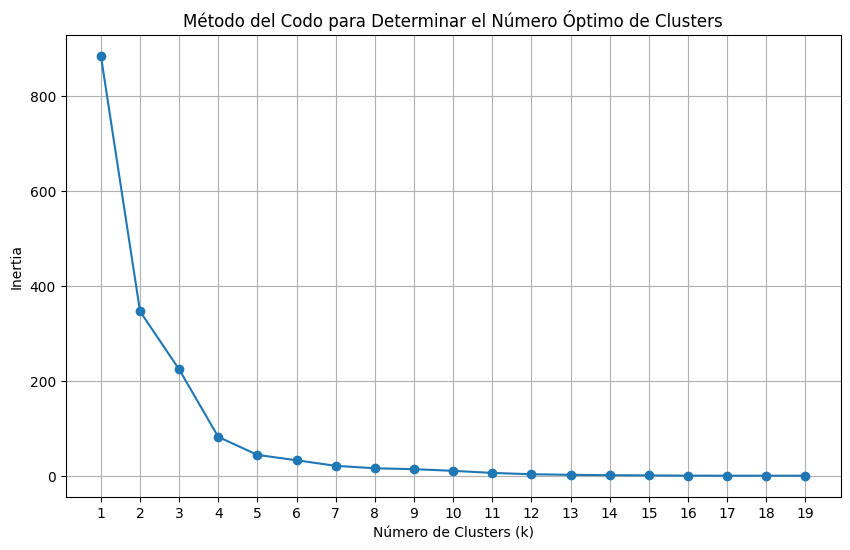

In [45]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k_values = range(1, 20)
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_grouped_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inertia')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [46]:
best_k = 3
print(f"El número óptimo de clusters según el método del codo es: {best_k}")

El número óptimo de clusters según el método del codo es: 3


In [47]:
features_scaled=pd.DataFrame(features_scaled,columns=features.columns)

In [48]:
features_scaled.set_index(features.index, inplace=True)

In [49]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X_grouped_pca)
features_scaled['cluster'] = kmeans.labels_

In [50]:
features.loc[features_scaled['cluster']==1]

mean_high    std_high      min_high    max_high   median_high  \
symbol                                                                         
AAVE          161.814378  126.532646  2.843307e+01  666.864979  9.768556e+01   
ALGORAND        0.548392    0.520006  9.031098e-02    3.280179  3.139220e-01   
ARWEAVE        18.235185   17.748374  5.432468e-01   90.940044  1.032052e+01   
BEAM            0.027434    0.002848  2.259617e-02    0.036106  2.739218e-02   
BITGET          0.375218    0.320654  6.124466e-02    1.484946  2.063653e-01   
BITTENSOR     240.463945  218.909496  1.263059e-01  767.679680  8.900580e+01   
BNB           184.890976  194.159060  1.012110e-01  720.672601  3.956654e+01   
BONK            0.000009    0.000012  1.550170e-07    0.000047  9.110732e-07   
CELESTIA       12.772593    4.537133  2.387579e+00   20.911431  1.258610e+01   
CORE            1.207535    0.881570  3.948388e-01    6.468240  8.587814e-01   
DOGWITFHAT      1.975274    1.476092  1.023224e-01    4.849967  2.624413e+00   
FLOW            6.983521    9.582740  4.174236e-01   46.162550  1.643889e+00   
INJECTIVO      11.019949   10.888107  7.275004e-01   52.749946  7.496356e+00   
JUPITER         1.040807    0.348534  4.871202e-01    2.043305  1.102047e+00   
MONERO        156.139566   72.959979  3.664537e+01  517.620245  1.516701e+02   
OKB            27.900801   17.714791  4.364133e+00   73.826134  2.177646e+01   
ONDO            0.729104    0.351956  2.173777e-01    1.478033  8.045957e-01   
OPTIMISM        1.963473    0.984733  4.711498e-01    4.851507  1.664738e+00   
PYTH NETWORK    0.564696    0.201325  2.649067e-01    1.150148  4.983664e-01   
SEI             0.476285    0.296468  1.009498e-01    1.141738  5.274498e-01   
SOLANA         57.658958   62.091222  5.597586e-01  260.062118  3.192939e+01   
STACKS          1.043839    0.826403  1.326523e-01    3.840639  7.309643e-01   
SUI             0.977701    0.453032  3.829455e-01    2.177310  8.443534e-01   
THOR            3.714977    4.041267  9.259689e-03   21.261401  1.792306e+00   

              range_high  skewness_high  kurtosis_high    mean_low  \
symbol                                                               
AAVE          638.431909       1.356393       0.838624  146.966005   
ALGORAND        3.189868       1.637705       2.112233    0.494505   
ARWEAVE        90.396797       1.420675       1.260659   16.190538   
BEAM            0.013510       0.522729       0.249499    0.025112   
BITGET          1.423701       1.446782       1.515871    0.358896   
BITTENSOR     767.553374       0.802111      -0.738479  215.352777   
BNB           720.571390       0.721295      -0.645159  174.563692   
BONK            0.000047       1.199404       0.157983    0.000007   
CELESTIA       18.523852      -0.339860      -0.520661   11.558204   
CORE            6.073401       1.617502       3.338474    1.087072   
DOGWITFHAT      4.747645      -0.055295      -1.625763    1.675601   
FLOW           45.745127       1.699903       2.023737    6.273301   
INJECTIVO      52.022445       1.637057       1.960975    9.918762   
JUPITER         1.556185       0.030408      -0.487894    0.926339   
MONERO        480.974872       1.063289       2.151792  146.442812   
OKB            69.462001       0.436050      -1.113829   26.419669   
ONDO            1.260655       0.221685      -0.743142    0.648819   
OPTIMISM        4.380357       0.759353      -0.216595    1.794241   
PYTH NETWORK    0.885242       0.997929       0.211535    0.505639   
SEI             1.040788       0.122621      -1.383648    0.428025   
SOLANA        259.502359       1.248821       0.468335   52.831511   
STACKS          3.707987       1.061184       0.381688    0.942527   
SUI             1.794365       0.642241      -0.738621    0.898893   
THOR           21.252141       1.428544       1.838562    3.298745   

                 std_low  ...  skewness_close  kurtosis_close   mean_volume  \
symbol                    ...     

/tmp/ipykernel_27206/3921138115.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_grouped_pca_[ix, 0], X_grouped_pca_[ix, 1], label=f'Cluster {cluster}', cmap='viridis')


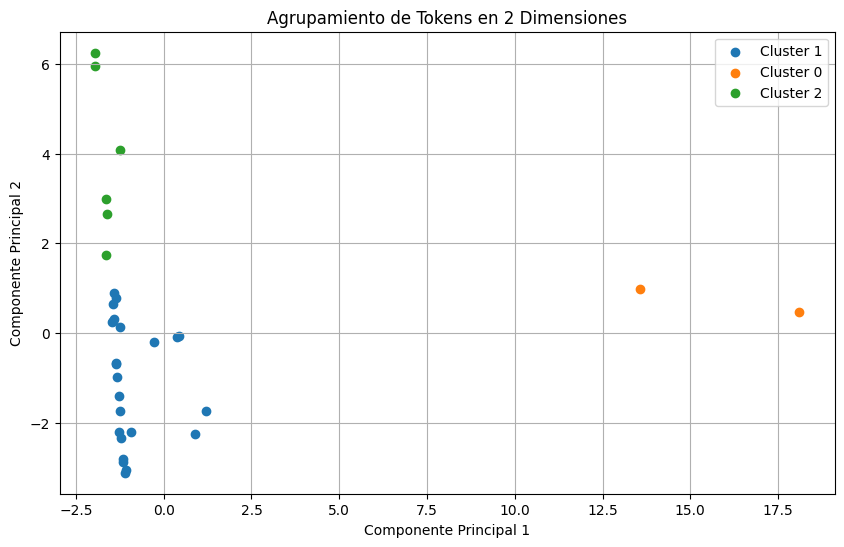

In [51]:
pca_ = PCA(n_components=2).fit(features_scaled.drop(columns='cluster'))
X_grouped_pca_ = pca_.transform(features_scaled.drop(columns='cluster'))

plt.figure(figsize=(10, 6))

clusters_unique = features_scaled['cluster'].unique()

for cluster in clusters_unique:
    ix = features_scaled['cluster'] == cluster
    plt.scatter(X_grouped_pca_[ix, 0], X_grouped_pca_[ix, 1], label=f'Cluster {cluster}', cmap='viridis')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Agrupamiento de Tokens en 2 Dimensiones')
plt.grid(True)
plt.legend()
plt.show()

In [52]:
features_scaled.groupby('cluster').size()

cluster
0     2
1    24
2     6
dtype: int64

In [53]:
for cluster_id, group in features_scaled.groupby('cluster'):
    print(f'Cluster {cluster_id}')
    print(group.index.tolist())

Cluster 0
['ETHERIUM', 'MAKER']
Cluster 1
['AAVE', 'ALGORAND', 'ARWEAVE', 'BEAM', 'BITGET', 'BITTENSOR', 'BNB', 'BONK', 'CELESTIA', 'CORE', 'DOGWITFHAT', 'FLOW', 'INJECTIVO', 'JUPITER', 'MONERO', 'OKB', 'ONDO', 'OPTIMISM', 'PYTH NETWORK', 'SEI', 'SOLANA', 'STACKS', 'SUI', 'THOR']
Cluster 2
['FANTOM', 'FETCH_AI', 'FLOKI', 'GALA', 'THETA', 'XRP']


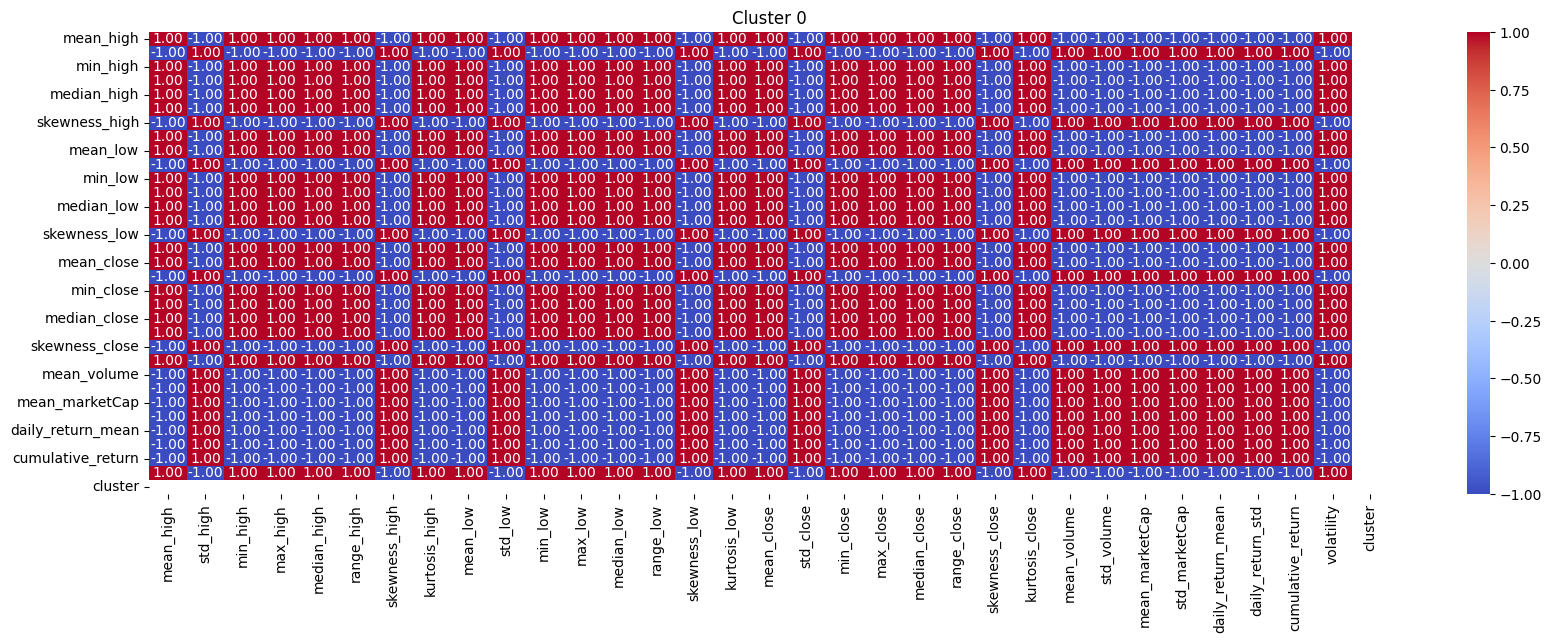

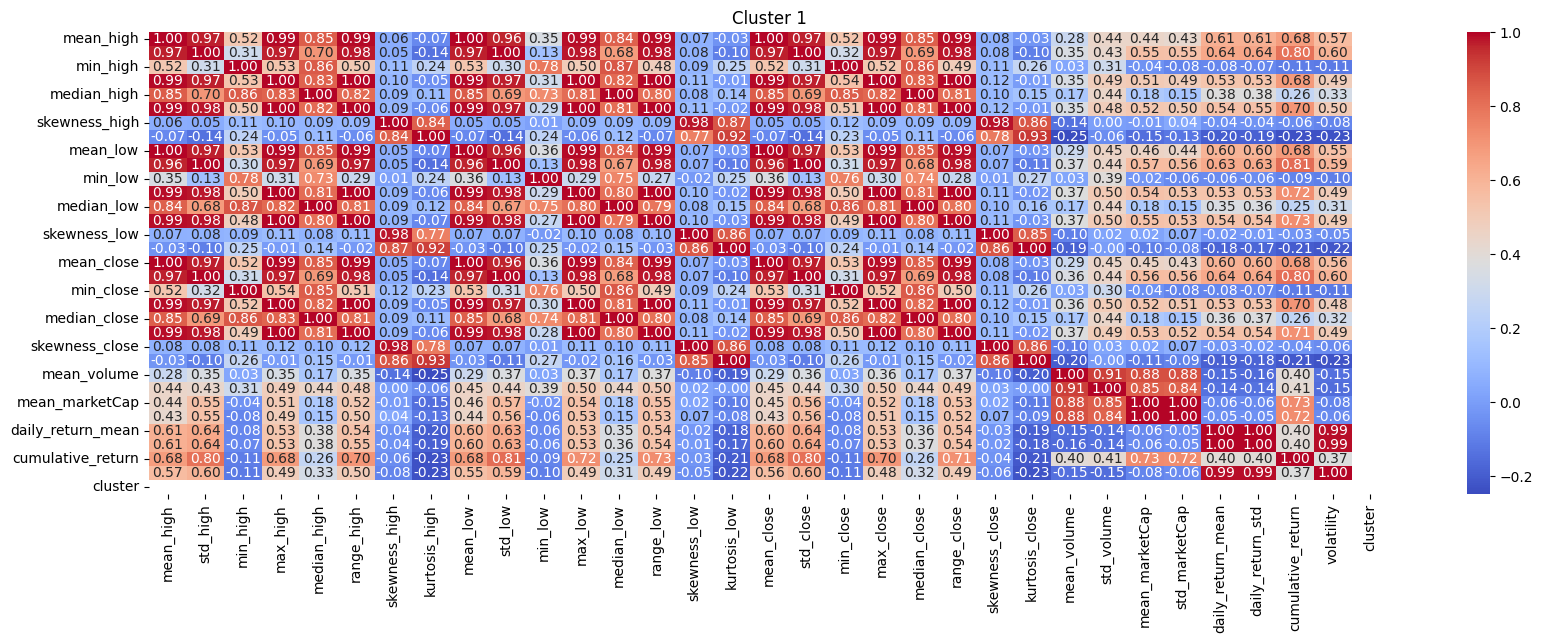

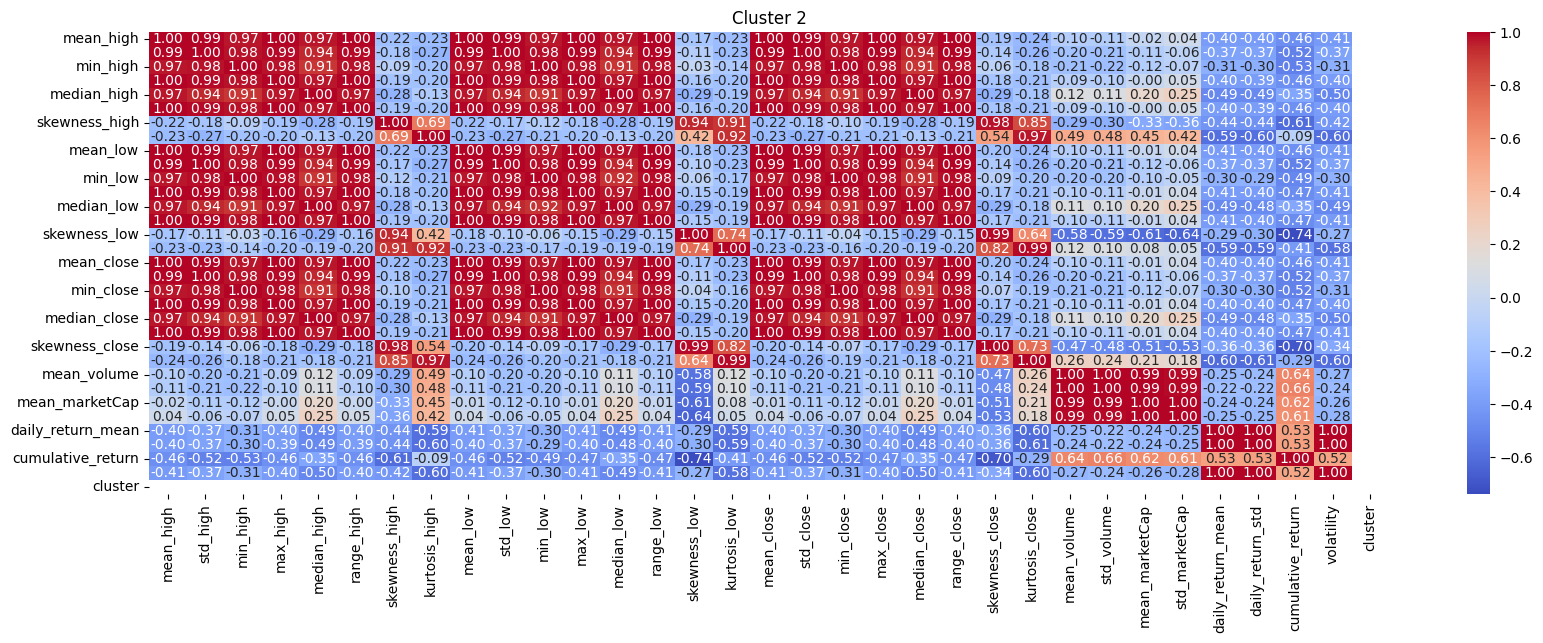

In [54]:
for cluster_id, group in features_scaled.groupby('cluster'):
    plt.figure(figsize=(20, 6))
    plt.title(f'Cluster {cluster_id}')
    sns.heatmap(group.corr(), annot=True, cmap='coolwarm', fmt='.2f')

vemos la correlacion de cada cluster y vemos que el cluster 1 es descartable por que tienen un correlacion total o nada, el cluster 1 y 2 son de interes debido qeu en ambos hay una correalacion notable entre algunos datos pero el cluster de mayor interes el cluster 2. debido a su similar comportamiento vamos a realizar un modelo de LSTM  para predecir su precio close con estos datos de este grupo de tokens

In [55]:
#group 2 cluster
inters_tokens=tokens__.loc[tokens__['symbol'].isin(features_scaled.loc[features_scaled['cluster']==2].index)]

In [56]:
inters_tokens.drop(columns=['name'],inplace=True)

/tmp/ipykernel_27206/2700765746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inters_tokens.drop(columns=['name'],inplace=True)


In [57]:
inters_tokens['symbol'].unique()

array(['GALA', 'FLOKI', 'FANTOM', 'FETCH_AI', 'THETA', 'XRP'],
      dtype=object)

In [58]:
some_token = inters_tokens.loc[inters_tokens['symbol'] == 'FANTOM']

In [59]:
tokens_scaled_inters = pd.DataFrame()
scaler_tokens = StandardScaler()

for some_token in inters_tokens['symbol'].unique():
    token = inters_tokens.loc[inters_tokens['symbol'] == some_token]
    token_scaled = scaler_tokens.fit_transform(token.drop(columns='symbol'))
    token_scaled = pd.DataFrame(token_scaled, columns=token.drop(columns='symbol').columns)
    token_scaled['symbol'] = some_token
    tokens_scaled_inters = pd.concat([tokens_scaled_inters, token_scaled])

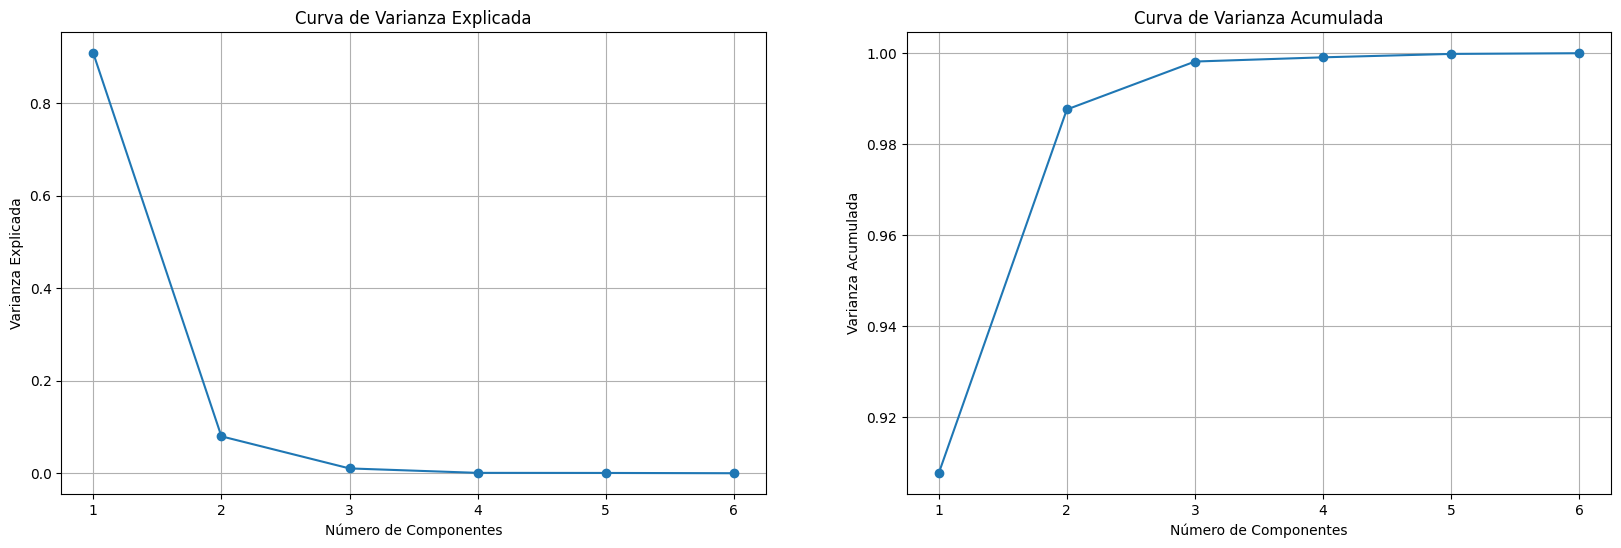

In [60]:
pca = PCA().fit(scaler_tokens.fit_transform(tokens_scaled_inters.drop(columns='symbol')))
fig,ax = plt.subplots(figsize=(20, 6),ncols=2, nrows=1)
ax[0].plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
ax[0].set_xlabel('Número de Componentes')
ax[0].set_ylabel('Varianza Explicada')
ax[0].set_title('Curva de Varianza Explicada')
ax[0].grid(True)
ax[1].plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
ax[1].set_xlabel('Número de Componentes')
ax[1].set_ylabel('Varianza Acumulada')
ax[1].set_title('Curva de Varianza Acumulada')
ax[1].grid(True)
plt.show()

In [61]:
n_components = pca.explained_variance_ratio_[pca.explained_variance_ratio_.cumsum() < 0.95].shape[0]
print(f'Número de componentes para explicar el 95% de la varianza: {n_components}')

Número de componentes para explicar el 95% de la varianza: 1


In [62]:
tokens_scaled_inters_reduced = pd.DataFrame()
pca = PCA(n_components)

for some_token in tokens_scaled_inters['symbol'].unique():
    token = tokens_scaled_inters.loc[tokens_scaled_inters['symbol'] == some_token]
    token_pca = pca.fit_transform(token.drop(columns='symbol'))
    token_pca = pd.DataFrame(token_pca, columns=[f'PC{i}' for i in range(1, n_components + 1)])
    token_pca['symbol'] = some_token
    tokens_scaled_inters_reduced = pd.concat([tokens_scaled_inters_reduced, token_pca])


In [65]:
tokens_scaled_inters_reduced.symbol.unique()

array(['GALA', 'FLOKI', 'FANTOM', 'FETCH_AI', 'THETA', 'XRP'],
      dtype=object)

In [66]:
some_token = tokens_scaled_inters_reduced.loc[tokens_scaled_inters_reduced['symbol'] == 'FANTOM']

In [129]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [133]:
token_data = some_token.drop(columns='symbol')
symbol = some_token['symbol']

scaler = MinMaxScaler(feature_range=(0, 1))
token_data_scaled = scaler.fit_transform(token_data.values.reshape(-1, 1))

def create_dataset(X, y, time_steps=1,n_future=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps - n_future):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps:i + time_steps + n_future])
    return np.array(Xs), np.array(ys)

time_steps = 50
n_future = 5

X, y = create_dataset(token_data_scaled, token_data_scaled, time_steps,n_future)

X = X.reshape(X.shape[0], X.shape[1], 1)





/home/dev/workspace/tfml/.conda/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [134]:
model.fit(X, y, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
1770/1770 - 5s - 3ms/step - loss: 0.0032
Epoch 2/100
1770/1770 - 4s - 3ms/step - loss: 0.0021
Epoch 3/100
1770/1770 - 4s - 3ms/step - loss: 0.0019
Epoch 4/100
1770/1770 - 4s - 3ms/step - loss: 0.0016
Epoch 5/100
1770/1770 - 4s - 3ms/step - loss: 0.0015
Epoch 6/100
1770/1770 - 4s - 3ms/step - loss: 0.0015
Epoch 7/100
1770/1770 - 5s - 3ms/step - loss: 0.0014
Epoch 8/100
1770/1770 - 4s - 3ms/step - loss: 0.0014
Epoch 9/100
1770/1770 - 4s - 3ms/step - loss: 0.0014
Epoch 10/100
1770/1770 - 4s - 3ms/step - loss: 0.0014
Epoch 11/100
1770/1770 - 5s - 3ms/step - loss: 0.0014
Epoch 12/100
1770/1770 - 4s - 3ms/step - loss: 0.0014
Epoch 13/100
1770/1770 - 4s - 3ms/step - loss: 0.0014
Epoch 14/100
1770/1770 - 4s - 3ms/step - loss: 0.0014
Epoch 15/100
1770/1770 - 5s - 3ms/step - loss: 0.0013
Epoch 16/100
1770/1770 - 4s - 3ms/step - loss: 0.0013
Epoch 17/100
1770/1770 - 5s - 3ms/step - loss: 0.0013
Epoch 18/100
1770/1770 - 4s - 3ms/step - loss: 0.0013
Epoch 19/100
1770/1770 - 4s - 3ms/ste

In [137]:
test_input = token_data.values[-time_steps:].reshape(1, time_steps, 1)

# Hacer predicciones
predicted = model.predict(test_input)
predicted = scaler.inverse_transform(predicted)

print(predicted)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
[[10.031472 11.910251 12.478366 12.252436 12.585553]]
